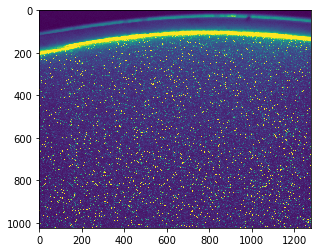

In [12]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import openpiv.preprocess
import numpy
import cv2
img_a  = openpiv.tools.imread( 'mpim1b.bmp')
img_b  = openpiv.tools.imread( 'mpim1c.bmp')

import matplotlib.pyplot
%matplotlib inline

matplotlib.pyplot.imshow(img_a)
#matplotlib.pyplot.imshow(img_b)

# First masking

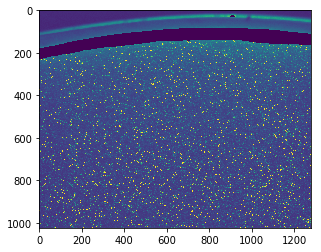

In [309]:
mask1= openpiv.preprocess.dynamic_masking(img_a.astype(numpy.int32), method='intensity',filter_size=10,threshold=0.005)
matplotlib.pyplot.imshow(mask1)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<matplotlib.figure.Figure at 0x7f2f24605c88>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f245e34a8>,
       dtype=object))

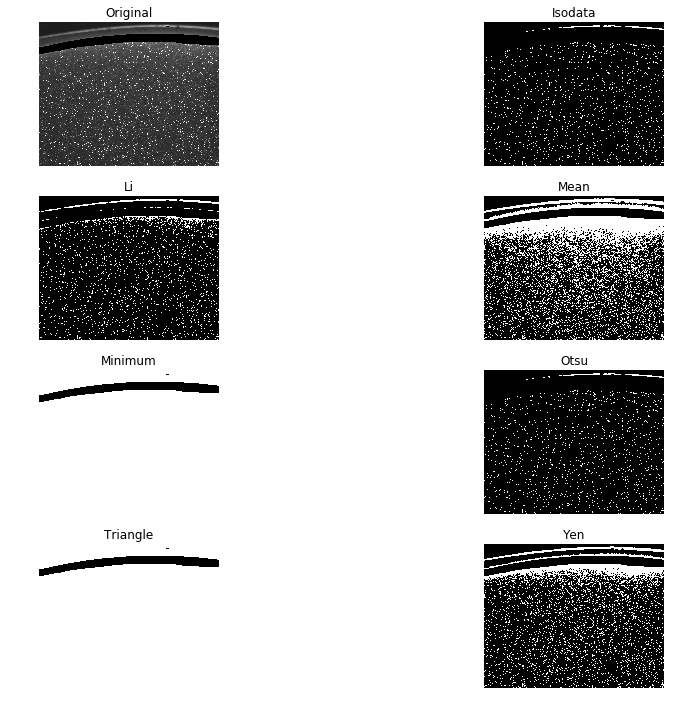

In [8]:
import skimage
#skimage.measure.label
#skimage.filters.try_all_threshold(img_a.astype(numpy.int32),figsize=(16, 10),   verbose=True)
skimage.filters.try_all_threshold(mask1.astype(numpy.int32),figsize=(16, 10), verbose=True)

In [ ]:
openpiv.preprocess.dynamic_masking?
#two dimensional array of uint16, uint8 or similar type
openpiv.preprocess.img_as_uint?

## Masking with thresholding 

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


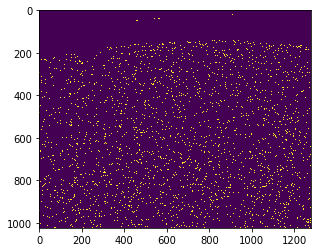

In [311]:
thresh = openpiv.preprocess.threshold_otsu(img_a.astype(numpy.int32), nbins= 20)
binary = mask1 > thresh
print(binary)
mask1= openpiv.preprocess.dynamic_masking(openpiv.preprocess.img_as_uint(binary), method='intensity',filter_size=7,threshold=0.005)
matplotlib.pyplot.imshow(mask1)

## Masking with opencv (cv2) - image processing package: 
### Segmentation by thresholding (region based segmentation) & filtering with Otsu's method (foreground from background)

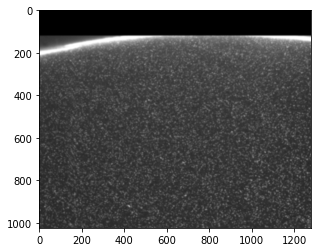

In [312]:
mask = numpy.zeros(img_a.shape, dtype = "uint8")

# Draw a white, filled rectangle on the mask image
cv2.rectangle(mask, (0,120), (1280, 1024), (255, 255, 255), -1)  #(1024, 1280)

# Apply the mask and display the result
maskedImg = cv2.bitwise_and(img_a, mask)
#cv2.namedWindow("Masked Image", cv2.WINDOW_NORMAL)
#cv2.imshow("Masked Image", maskedImg)
#cv2.waitKey(0)
import matplotlib.pyplot 
matplotlib.pyplot.imshow(maskedImg, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
matplotlib.pyplot.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


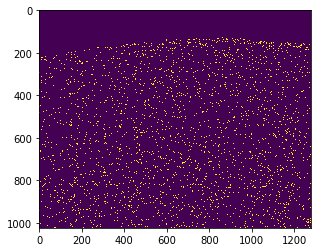

In [313]:
thresh = openpiv.preprocess.threshold_otsu(maskedImg.astype(numpy.int32), nbins= 20)
binary2 = maskedImg > thresh
print(binary2)
#maska= openpiv.preprocess.dynamic_masking(openpiv.preprocess.img_as_uint(binary2), method='intensity',filter_size=7,threshold=0.5)
maska= openpiv.preprocess.dynamic_masking(binary2, method='intensity',filter_size=7,threshold=0.5)
matplotlib.pyplot.imshow(maska)

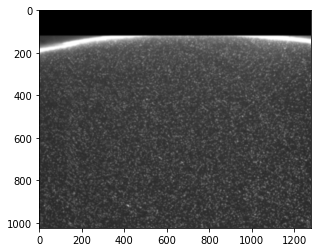

In [314]:
mask = numpy.zeros(img_b.shape, dtype = "uint8")

# Draw a white, filled rectangle on the mask image
cv2.rectangle(mask, (0,120), (1280, 1024), (255, 255, 255), -1)  #(1024, 1280)

# Apply the mask and display the result
maskedImg_b = cv2.bitwise_and(img_b, mask)
#cv2.namedWindow("Masked Image", cv2.WINDOW_NORMAL)
#cv2.imshow("Masked Image", maskedImg)
#cv2.waitKey(0)
import matplotlib.pyplot
matplotlib.pyplot.imshow(maskedImg_b, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
matplotlib.pyplot.show()

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


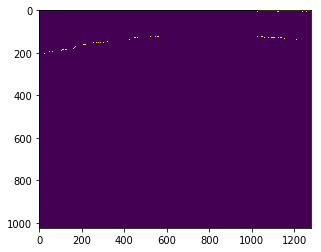

In [22]:
#mask2= openpiv.preprocess.dynamic_masking(img_b.astype(numpy.int32), method='intensity',filter_size=20,threshold=0.005)
#matplotlib.pyplot.imshow(mask2)
thresh = openpiv.preprocess.threshold_otsu(mask1.astype(numpy.int32), nbins= 20)
binary2 = mask1 > thresh
print(binary2)
maskb= openpiv.preprocess.dynamic_masking(binary2, method='intensity',filter_size=7,threshold=0.5)
matplotlib.pyplot.imshow(maskb)

In [25]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
                
            else:
                cv2.circle(img1,(x,y),5,(0,0,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
        else:
            cv2.circle(img1,(x,y),5,(0,0,0),-1)

img1 = cv2.imread('mpim1b.bmp')
img1 = cv2.imread('maskimg1.jpg')
cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)

while(1):  #while True
    cv2.imshow('image',img1)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC on keyboard closes the window
        cv2.destroyAllWindows()
        break
    elif k == ord('s'):  #if "s" is pressed on the keyboard,  
        cv2.imwrite("maskimg1.jpg", img1)
        cv2.destroyAllWindows()                         #and the window is closed
        break

cv2.destroyAllWindows()

In [26]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img2,(ix,iy),(x,y),(0,0,0),-1)
            else:
                cv2.circle(img2,(x,y),5,(0,0,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img2,(ix,iy),(x,y),(0,0,0),-1)
        else:
            cv2.circle(img2,(x,y),5,(0,0,0),-1)

img2 = cv2.imread('mpim1c.bmp')
img2 = cv2.imread('maskimg2.jpg')
cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)

while(1):  #while True
    cv2.imshow('image',img2)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC on keyboard closes the window
        cv2.destroyAllWindows()
        break
    elif k == ord('s'):  #if "s" is pressed on the keyboard,  
        cv2.imwrite("maskimg2.jpg", img2)   #the resulting drawing is saved
        cv2.destroyAllWindows()                         #and the window is closed
        break
cv2.destroyAllWindows()

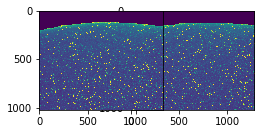

In [33]:
mask1 = openpiv.tools.imread('maskimg1.jpg')
mask2 = openpiv.tools.imread('maskimg2.jpg')
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(2, 1, 1)
ax.imshow(mask1)
#ax.autoscale(False)
ax2 = fig.add_subplot(2, 2, 1)
ax2.imshow(mask2)
#ax2.autoscale(False)
matplotlib.pyplot.show()
#matplotlib.pyplot.imshow(mask1)

matplotlib.

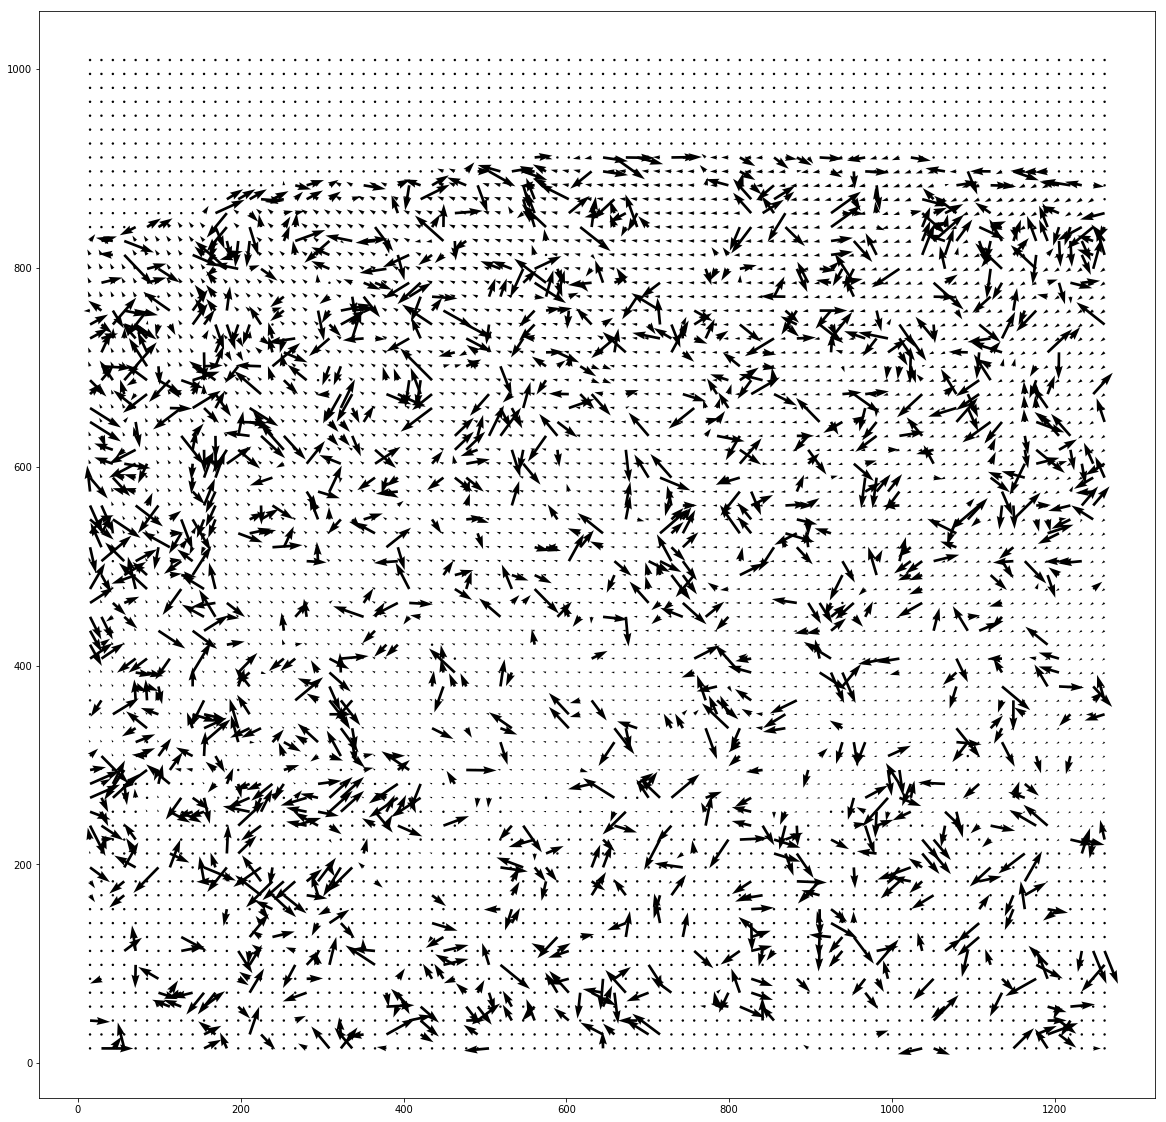

In [29]:
window_size=30 #24
search_areasize = 120 #64
overlap = 16 #12
u, v, sig2noise = openpiv.process.extended_search_area_piv(mask1.astype(numpy.int32),
                                                           mask2.astype(numpy.int32),
                                                           window_size=window_size,    #24
                                                           overlap=overlap, dt=0.012, #12
                                                           search_area_size=search_areasize, #subpixel_method=
                                                           sig2noise_method='peak2peak' ) 


#sig2noise_method specifies which method to use for the evalutaion of the signal/noise ratio.
#The function also returns a third array, sig2noise which contains the signal to noise ratio obtained 
#from each cross-correlation function, intended as the ratio between the heigth of the first and second peaks.

 # get window centers coordinates: We then compute the coordinates of the centers of the interrogation windows 
#using openpiv.process.get_coordinates().: (same options we have given in the previous command to the processing function.)
x, y = openpiv.process.get_coordinates( image_size=img_a.shape, window_size=window_size, overlap=overlap) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )
fig.savefig('primeira1.pdf')

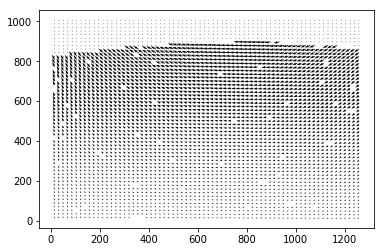

In [317]:
u1, v1, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )#1.3
#u1, v1, mask = openpiv.validation.global_val( u, v, (-55000, 15000), (-15000, 15000) )
matplotlib.pyplot.quiver( x, y, u1, v1 )

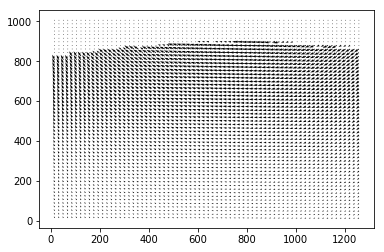

In [318]:
u, v = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=15, tol= 0.0001, kernel_size=2 )
matplotlib.pyplot.quiver( x, y, u, v )

In [ ]:
1280/0.28    #30 cm for 1024

In [304]:
openpiv.scaling.uniform?

/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


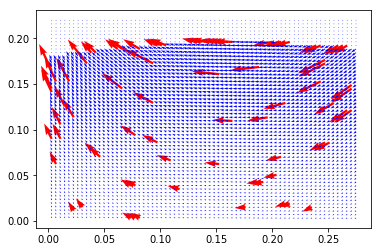

In [18]:
x2, y2, u2, v2 = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 4571)#scaling_factor in pixels per meter
openpiv.tools.save(x2, y2, u2, v2, mask, 'exp1_001.txt') #save the data to an ascii file, for later processing
openpiv.tools.display_vector_field('exp1_001.txt',scaling_factor=1)#, scale=100, width=0.005)

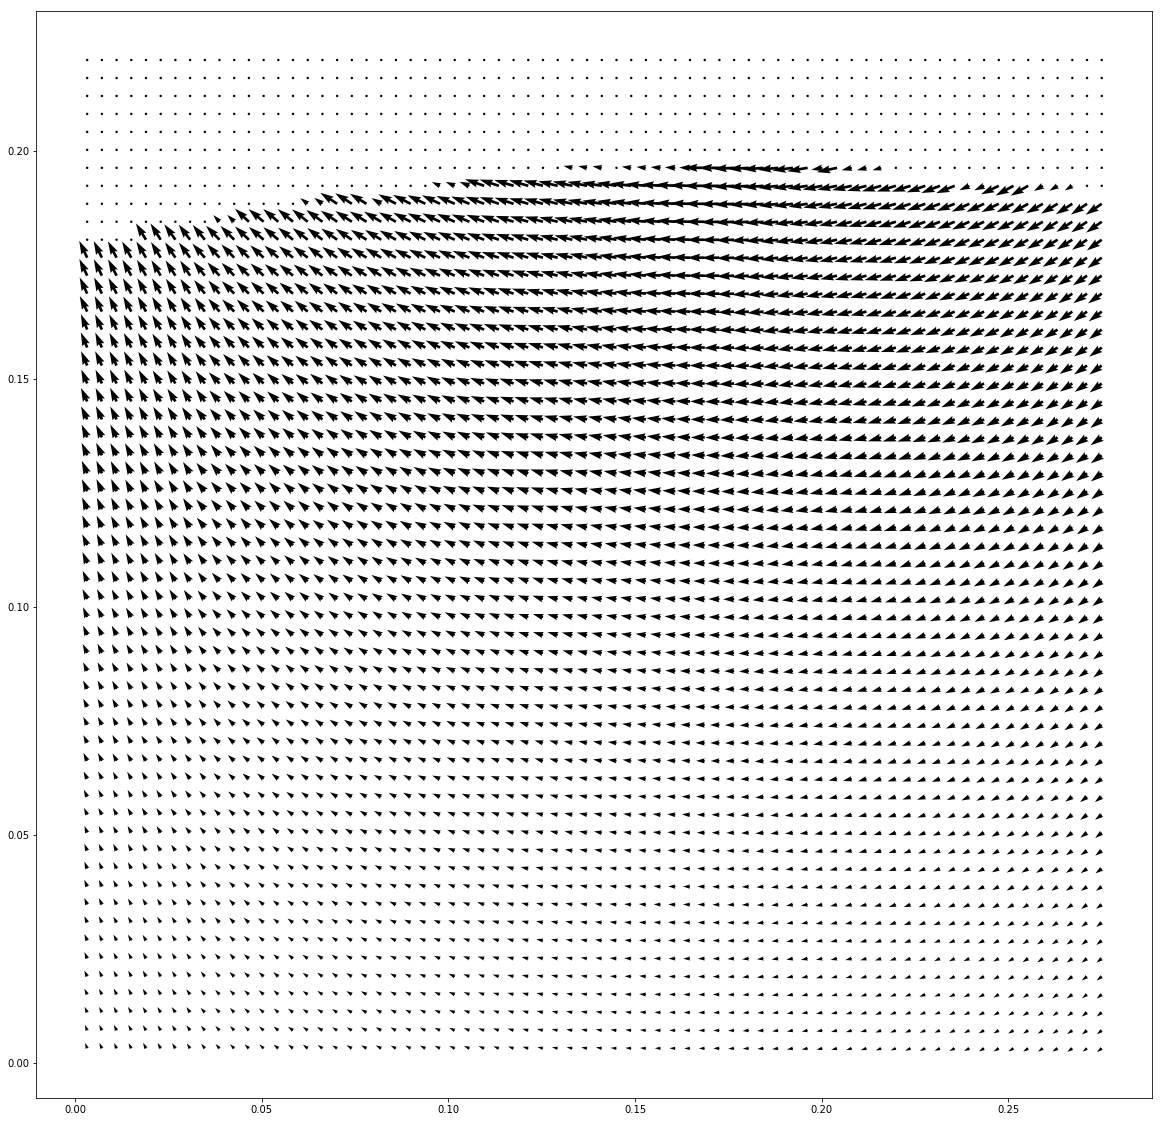

In [19]:
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x2, y2, u2, v2 )

In [ ]:
import skimage
#skimage.measure.label
#skimage.filters.try_all_threshold(img_a.astype(numpy.int32),figsize=(16, 10),   verbose=True)
skimage.filters.try_all_threshold(mask1.astype(numpy.int32),figsize=(16, 10), verbose=True)

In [ ]:
openpiv.process.get_coordinates?
Docstring:
Compute the x, y coordinates of the centers of the interrogation windows.

Parameters
----------
image_size: two elements tuple
    a two dimensional tuple for the pixel size of the image
    first element is number of rows, second element is 
    the number of columns.
    
window_size: int
    the size of the interrogation windows.
    
overlap: int
    the number of pixel by which two adjacent interrogation
    windows overlap.

In [ ]:
#pil_im = Image.open('empire.jpg').convert('L')  #convert to grey

In [9]:
import cv2
import numpy 

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = numpy.zeros((512,512,3), numpy.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC
        cv2.destroyAllWindows()
        break
    elif k == ord('s'):
        cv2.imwrite("testeemjpgcomopencv.jpg", gray_img)
        cv2.destroyAllWindows()
        break
    #cv2.imshow('image',img)
    #if cv2.waitKey(20) & 0xFF == 27:
    #    break
#cv2.destroyAllWindows()
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_mouse_handling/py_mouse_handling.html?highlight=coordinate


In [3]:
cv2.drawMarker? #drawMarker(img, position, color[, markerType[, markerSize[, thickness[, line_type]]]]) -> img
#.   @brief Draws a marker on a predefined position in an image.
cv2.

In [4]:
cv2.drawKeypoints?
#drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
#.   @brief Draws keypoints.
   
#.   @param image Source image.
#.   @param keypoints Keypoints from the source image.
#.   @param outImage Output image. Its content depends on the flags value defining what is drawn in the
#.   output image. See possible flags bit values below.
#.   @param color Color of keypoints.
#.   @param flags Flags setting drawing features. Possible flags bit values are defined by
#.   DrawMatchesFlags. See details above in drawMatches .

#.   @note
#.   For Python API, flags are modified as cv2.DRAW_MATCHES_FLAGS_DEFAULT,
#.   cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG,
#.   cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

In [213]:
# Define matching reference points in world coordinate
#[wx,wy] = ndgrid((0:5:20),(-5:-5:-10));    # same as matlab ndgrid:
n_x= 5    #number of points in x axis
n_y = 2   # number of points in y axis
first_x = 0
last_x = 20
first_y = -10
last_y = -5
import cmath 
#foo = n_x*cmath.sqrt(-1)
world1 = numpy.zeros((n_x*n_y,3), numpy.float32)  #numpy.zeros((6*7,3), numpy.float32)
#print(world)
world1[:,:2] = numpy.mgrid[first_x : last_x :n_x*cmath.sqrt(-1), first_y : last_y : n_y*cmath.sqrt(-1)].T.reshape(-1,2)
#print(world1)
#number of points = n_x*n_y

world = world1
#world= list(zip( world1[:,0], world1[:,1]))
world = world.astype('float32')
world

array([[  0., -10.,   0.],
       [  5., -10.,   0.],
       [ 10., -10.,   0.],
       [ 15., -10.,   0.],
       [ 20., -10.,   0.],
       [  0.,  -5.,   0.],
       [  5.,  -5.,   0.],
       [ 10.,  -5.,   0.],
       [ 15.,  -5.,   0.],
       [ 20.,  -5.,   0.]], dtype=float32)

In [73]:
import cv2
import numpy 

drawing = False # true if mouse is pressed
end = False # 
ix1,iy1 = -1,-1

numbPoints = 0
ix = []
iy = []

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,end, ix1, iy1, numbPoints, n_x, n_y
    
    if end ==False:        
        if event == cv2.EVENT_LBUTTONDBLCLK: 
            cv2.circle(img,(x,y),10,(255,0,0),-1)  #a circle is drawn
            numbPoints += 1
            if numbPoints == n_x*n_y:
                cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10) #last point connected to first point
                ix.append(x)
                iy.append(y)
            elif numbPoints > n_x*n_y:
                end = True  
            else:
                if drawing == True:
                    cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                ix1,iy1 = x,y
                ix.append(x)
                iy.append(y)
                drawing = True
                
        
        elif event == cv2.EVENT_LBUTTONUP :
            cv2.circle(img,(x,y),10,(255,0,0),-1)  #a circle is drawn
            numbPoints += 1
            print(numbPoints, n_x*n_y)
            if numbPoints == n_x*n_y:
                cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                #print(cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10))
                cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10) #last point connected to first point
                ix.append(x)
                iy.append(y)
            elif numbPoints > n_x*n_y:
                end = True  
            else:
                if drawing == True:
                    cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                ix1,iy1 = x,y
                ix.append(x)
                iy.append(y)
                drawing = True
                
            
img = cv2.imread('mpwoco.bmp')
cv2.namedWindow('image',cv2.WINDOW_NORMAL) #cv2.WINDOW_NORMAL in order to resize window, when image is large
cv2.setMouseCallback('image',draw_circle)

cv2.imshow('image',img)

while(1):  #while True
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC on keyboard closes the window
        cv2.destroyAllWindows()
        break
    elif k == ord('s'):  #if "s" is pressed on the keyboard,  
        cv2.imwrite("testeemjpgcomopencv.jpg", gray_img)   #the resulting drawing is saved
        cv2.destroyAllWindows()                         #and the window is closed
        break
 
print(ix, iy) #pixel
#pixelX= ix[0:-1]
#pixelY = iy[0:-1]
pixelX = ix
pixelY = iy
print(pixelX, pixelY)
pixel = numpy.array([pixelX, pixelY]).astype('float32').transpose()
#objp[:,:2] = numpy.mgrid[0:7,0:6].T.reshape(-1,2)
pixel

1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10
11 10
[93, 378, 674, 969, 1266, 93, 379, 672, 971, 1260] [821, 816, 821, 819, 824, 526, 528, 530, 518, 526]
[93, 378, 674, 969, 1266, 93, 379, 672, 971, 1260] [821, 816, 821, 819, 824, 526, 528, 530, 518, 526]


In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #'mpwoco.bmp' converted to gray
#returns the camera matrix, distortion coefficients, rotation and translation vectors etc:

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([world], [pixel], gray.shape[::-1],None,None) 
#calibrateCamera(objectPoints, imagePoints, imageSize, cameraMatrix, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]) -> retval, cameraMatrix, distCoeffs, rvecs, tvecs

In [135]:
mtx #camera matrix

array([[1.05385883e+03, 0.00000000e+00, 6.18712632e+02],
       [0.00000000e+00, 1.03955460e+03, 2.34191565e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [136]:
dist #Output vector of distortion coefficients (k_1, k_2, p_1, p_2[, k_3[, k_4, k_5, k_6]]) of 4, 5, or 8 elements.

array([[-0.33054221,  0.62239834,  0.02118714, -0.00930947, -0.3916004 ]])

In [137]:
rvecs #Output vector of rotation vectors 

[array([[ 3.14734952],
        [-0.02117439],
        [-0.0745772 ]])]

In [138]:
tvecs #Output vector of translation vectors estimated for each pattern view

[array([[-9.13300115],
        [ 0.0259448 ],
        [17.65887982]])]

In [140]:
ret
#cv2.remap

2.6606229875184226

In [243]:
#Finds a perspective transformation between two planes.
H= cv2.findHomography(cv2.convertPointsToHomogeneous(pixel),cv2.convertPointsToHomogeneous(world[:,0:2])) 
#H = cv2.findHomography(world,cv2.convertPointsToHomogeneous(pixel)) 
tform = H[0]
print(tform)

[[ 1.75386225e-02  6.21553710e-05 -1.65368205e+00]
 [-1.24807347e-04 -1.73716641e-02  4.12827603e+00]
 [ 1.61612829e-05  1.17315316e-05  1.00000000e+00]]


In [244]:
#numpy.matmul(numpy.asmatrix(H[0]),cv2.convertPointsToHomogeneous(pixel).transpose())
xc = numpy.matmul(tform,cv2.convertPointsToHomogeneous(pixel)[0].transpose())
print(xc)
print(xc/xc[2])

#xc = numpy.matmul(H[0],cv2.convertPointsToHomogeneous(world[:,0:2])[0].transpose())
#print(xc)
#print(xc/xc[2], cv2.convertPointsToHomogeneous(pixel)[0])
#cv2.convertPointsToHomogeneous(world[:,0:2])[0]

[[  0.0284394 ]
 [-10.14546727]
 [  1.01113459]]
[[  0.02812623]
 [-10.03374565]
 [  1.        ]]


/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


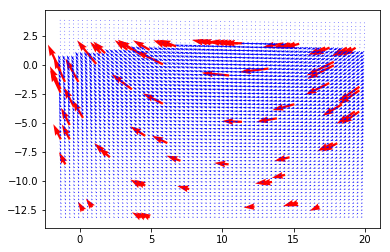

In [488]:
def pixel2world(tform, U, V, X, Y, dt):
    
    pixelX= X.reshape(X.size,1)

    pixelY= Y.reshape(Y.size,1)
    pixelY = numpy.sort(pixelY, axis=0) 
    V= numpy.fliplr(V.reshape(V.size,1))
    #V=numpy.fliplr(V)
    
    pixel = numpy.array([pixelX, pixelY]).astype('float32').transpose()
    xc = numpy.matmul(tform,cv2.convertPointsToHomogeneous(pixel).transpose().reshape(3,x.size))
    worldrec= cv2.convertPointsFromHomogeneous(xc.transpose()) #converting to world coordinates
    #xn = worldrec.shape[0]
    #yn = worldrec.shape[2]
    #xw = worldrec.reshape(xn,yn)[:,0]
    #yw = worldrec.reshape(xn,yn)[:,1]
    xw = worldrec[:,:,0]
    yw = worldrec[:,:,1]
    #linear case, the jacobian is : tform[0:2,0:2]
    Jacl = tform[0:2,0:2]
    
    uv=numpy.matmul(Jacl, numpy.array([U.reshape(U.size,1),V]).astype('float32')[:,:,0])
    #Uw = uv[0].reshape(u.shape[0],u.shape[1])
    #Vw = uv[1].reshape(v.shape[0],v.shape[1])
    un = uv.shape[0]
    vn = uv.shape[1]
    Uw = uv[0,:] #numpy.flip(uv[0,:],0)  
    Vw = -uv[1,:] #numpy.flip(uv[1,:],0)   
    #Uw = (Jacl[0,0]*u + Jacl[0,1]*v  )/dt
    #Vw = (Jacl[1,0]*u + Jacl[1,1]*v  )/dt
    
    return Uw, Vw, xw, yw
uw, vw, xw, yw = pixel2world(tform, u, v, x, y, 0.012)
openpiv.tools.save(xw, yw, uw, vw, mask, 'exp1_001.txt') #save the data to an ascii file, for later processing
openpiv.tools.display_vector_field('exp1_001.txt',scaling_factor=1)#, scale=100, width=0.005)

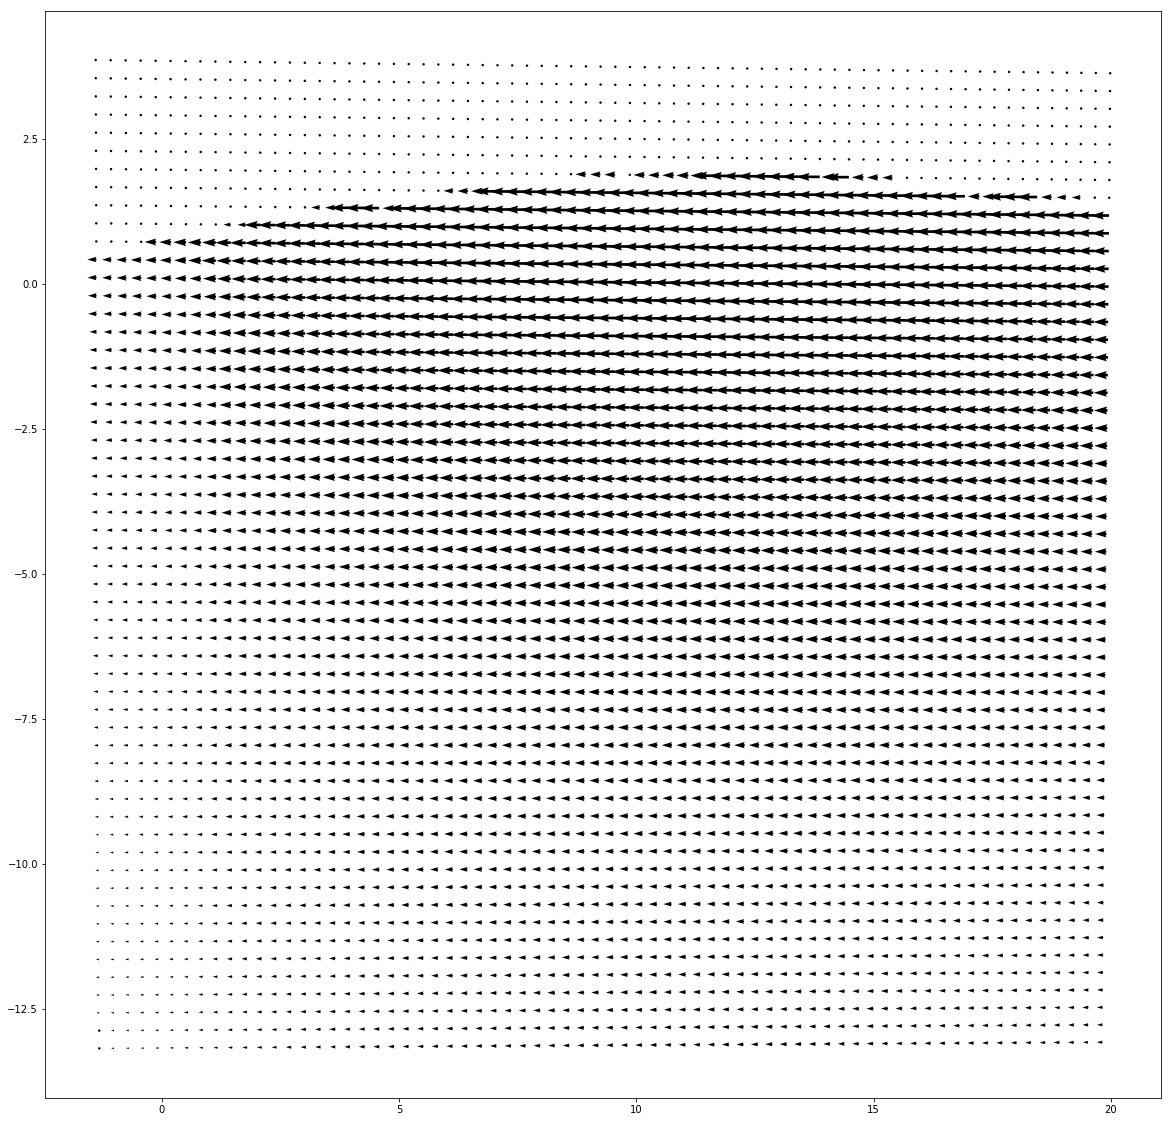

In [490]:
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( xw, yw, uw, vw)

In [509]:
# find the crest
max(abs(uw)) #crest
type(uw)
uw.size
numpy.argmax(abs(uw))
uw[464]
yw[464]
numpy.argmax(numpy.sqrt(uw**2 + vw**2)) # crest
xw[464] #place of crest
xw.reshape(x.shape[0],x.shape[1])

array([[-1.3890892 , -1.07321395, -0.7575223 , ..., 19.37615049,
        19.68007   , 19.98381623],
       [-1.38767796, -1.07186976, -0.75624508, ..., 19.3732363 ,
        19.67709375, 19.98077799],
       [-1.38626731, -1.07052614, -0.75496841, ..., 19.37032332,
        19.67411873, 19.97774101],
       ...,
       [-1.31510542, -1.00274511, -0.69056433, ..., 19.22334355,
        19.52400826, 19.8245034 ],
       [-1.31372523, -1.00143048, -0.6893152 , ..., 19.22049228,
        19.52109624, 19.82153072],
       [-1.31234562, -1.00011641, -0.6880666 , ..., 19.21764218,
        19.51818542, 19.81855925]])

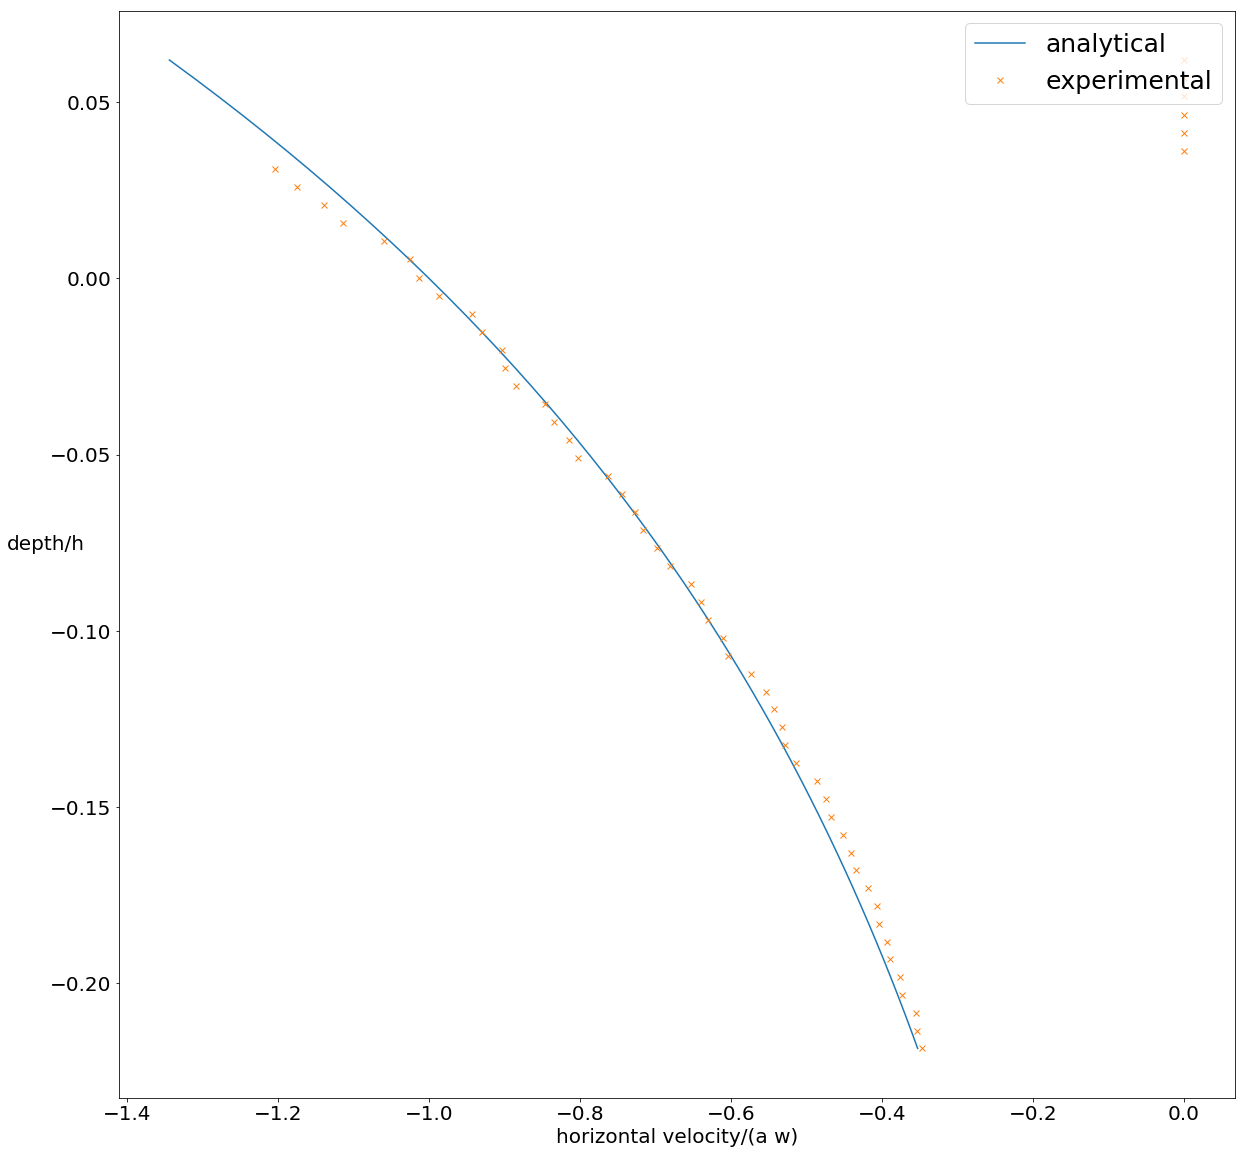

In [541]:
fig = matplotlib.pyplot.figure(figsize=[20,20])
UUw = uw.reshape(u.shape[0],u.shape[1])  #reshaped in u shape
VVw = vw.reshape(v.shape[0],v.shape[1]) 
XXw = xw.reshape(x.shape[0],x.shape[1])
YYw = yw.reshape(y.shape[0],y.shape[1])
abc = numpy.argmax(numpy.sqrt(UUw**2 + VVw**2)) # index of crest point
#print(abc)
Uw_Crest = uw[abc] #horizontal velocity at crest
#print(uw[464],Uw_Crest)
#print("Values equal Uw_Crest = ", UUw[UUw==Uw_Crest])
indices = numpy.nonzero(UUw == Uw_Crest)  #indices in 2D coordinates
#print("Their indices are ", numpy.nonzero(UUw == Uw_Crest), UUw[numpy.nonzero(UUw == Uw_Crest)], 
#    VVw[numpy.nonzero(UUw == Uw_Crest)], XXw[numpy.nonzero(UUw == Uw_Crest)], YYw[numpy.nonzero(UUw == Uw_Crest)])
#print(indices[0], indices[1])
a = 2.05
w = 8.95
k = 0.0795
h = 0.6*100 # cm
#print(YYw[:, indices[1]])
vs = -a*w*numpy.exp(k*YYw[:, indices[1]])  ##vx = -a*w*exp(k*yw(:,25));
#print(vs)
vw_s = vs/(a*w)    #scaling analytical value 
#plot(vx_s, yw(:,25)/h,  Uw(:,25)/(a*w),yw(:,25)/h,'x')
matplotlib.pyplot.plot( vw_s, YYw[:, indices[1]]/h, UUw[:, indices[1]]/(a*w), YYw[:, indices[1]]/h,'x')
matplotlib.pyplot.legend(['analytical', 'experimental'], fontsize= 25, loc= 1)
matplotlib.pyplot.ylabel('depth/h', fontsize= 20, rotation='horizontal')#(r'$\phi_1$', fontsize= 20, rotation='horizontal')
matplotlib.pyplot.xlabel('horizontal velocity/(a w)', fontsize= 20)#(r' $\theta  $ ', fontsize= 20)
matplotlib.pyplot.xticks(size=20)#(-1, 0, 1), ('-1', '0', '1'), color='k', size=20)
matplotlib.pyplot.yticks(size=20)

#matplotlib.pyplot.legend([r'$\frac{m_{11}}{\pi \rho b_0^2}$',r"$\frac{m_{22}}{\pi\rho a_0^2}$",
                         # r"$\frac{m_{66}}{8\pi\rho(a_0^2-b_0^2)^2}$"])
#matplotlib.pyplot.title('Ellipse $b_{0}/a_{0}$ = 0.5')

#fig.savefig('.pdf')
matplotlib.pyplot.show()

In [ ]:
cv2.projectPoints(objectPoints, rvec, tvec, cameraMatrix, distCoeffs[, imagePoints[, jacobian[, aspectRatio]]]) → imagePoints, jacobian

In [295]:
imagepoints, jacobian= cv2.projectPoints(world, rvecs[0], tvecs[0], mtx, dist)
#cv2.projectPoints?

In [414]:
print(numpy.array([u.reshape(u.size,1),v.reshape(v.size,1)]).astype('float32')[:,:,0])
print(numpy.array([u.reshape(u.size,1),v.reshape(v.size,1)]).astype('float32').transpose()[0])
print(numpy.array([u.reshape(u.size,1),v.reshape(v.size,1)]).astype('float32').transpose()[0].transpose())

[[   0.         0.         0.      ... -302.44574 -264.38013 -286.21927]
 [   0.         0.         0.      ... -213.89897 -203.26106 -223.70784]]
[[   0.         0.     ]
 [   0.         0.     ]
 [   0.         0.     ]
 ...
 [-302.44574 -213.89897]
 [-264.38013 -203.26106]
 [-286.21927 -223.70784]]
[[   0.         0.         0.      ... -302.44574 -264.38013 -286.21927]
 [   0.         0.         0.      ... -213.89897 -203.26106 -223.70784]]


In [351]:
abc= numpy.array([[1,2,3],[4,5,6]]).reshape(6,1)
abc
dfg= numpy.array([[7,8,9],[10,11,12]]).reshape(6,1)
numpy.array([abc,dfg]).astype('float32').transpose()

array([[[ 1.,  7.],
        [ 2.,  8.],
        [ 3.,  9.],
        [ 4., 10.],
        [ 5., 11.],
        [ 6., 12.]]], dtype=float32)

In [400]:
#pixelX= X.reshape(X.size,1)

#pixelY= Y.reshape(Y.size,1)
    
    
pixelabc = numpy.array([x.reshape(x.size,1), y.reshape(y.size,1)]).astype('float32').transpose()
xc = numpy.matmul(tform,cv2.convertPointsToHomogeneous(pixelabc).transpose().reshape(3,x.size)) #!!!!!!!! mudar dimensao 10

worldrec= cv2.convertPointsFromHomogeneous(xc.transpose()) #converting to world coordinates
xn = worldrec.shape[0]
yn = worldrec.shape[2]
xw = worldrec.reshape(xn,yn)[:,0]
yw = worldrec.reshape(xn,yn)[:,1]
Jacl = tform[0:2,0:2]
uv=numpy.matmul(Jacl, numpy.array([u.reshape(u.size,1),v.reshape(v.size,1)]).astype('float32').transpose()[0].transpose())
Uw = uv[0].reshape(u.shape[0],u.shape[1])
Vw = uv[1].reshape(v.shape[0],v.shape[1])

In [403]:
numpy.array([u.reshape(u.size,1),v.reshape(v.size,1)]).astype('float32').transpose()[0].transpose()


array([[   0.     ,    0.     ,    0.     , ..., -302.44574, -264.38013,
        -286.21927],
       [   0.     ,    0.     ,    0.     , ..., -213.89897, -203.26106,
        -223.70784]], dtype=float32)

In [404]:
numpy.array([u.reshape(u.size,1),v.reshape(v.size,1)]).astype('float32')#.transpose()[0].shape

array([[[   0.     ],
        [   0.     ],
        [   0.     ],
        ...,
        [-302.44574],
        [-264.38013],
        [-286.21927]],

       [[   0.     ],
        [   0.     ],
        [   0.     ],
        ...,
        [-213.89897],
        [-203.26106],
        [-223.70784]]], dtype=float32)

In [406]:
numpy.array([u.reshape(u.size,1),v.reshape(v.size,1)]).astype('float32').transpose().shape
u

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [-153.3673591 , -165.25268411, -173.65010428, ..., -316.53594696,
        -316.36682871, -300.57016747],
       [-138.03481936, -159.78749454, -166.43651182, ..., -310.73379247,
        -303.25698589, -286.56514237],
       [-124.99999891, -154.1544583 , -155.44636909, ..., -302.44572694,
        -264.38013483, -286.21927648]])

In [ ]:
"""
Opening a video from a file
"""

cv2.namedWindow("Video file")
cap = cv2.VideoCapture('/Users/chris/Downloads/small.mp4')

while cap.isOpened():
    ret, frame = cap.read(1)
    if not ret:
        print 'oh no'
        break
    cv2.imshow("Video file", frame)

    k = cv2.waitKey(60) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()
cap.release()
